## Imports

In [88]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import os.path
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import cv2
import os
import sys
from os.path import exists
from scipy import spatial

## Settings

In [89]:
im_dir = '/home/drevital/obstacles_classification_datasets/rgb_6_balanced/train/obstacle'
im_name = '159_2975_.93_2021-08-16--15-33-26_.jpg'

## Read Image

In [90]:
im = tf.io.read_file(os.path.join(im_dir, im_name))
im = tf.io.decode_jpeg(im, channels=3)
im_src = im

## Convert Size to (224, 224)

In [91]:
w = im.shape[1]
im1 = im[:, :w//2, :]
im2 = im[:, w//2:, :]
src_im1 = im1
src_im2 = im2
im1 = tf.image.resize_with_pad(im1, 224, 224)
im1  = tf.image.convert_image_dtype(im1, tf.float32)[tf.newaxis, ...]
im2 = tf.image.resize_with_pad(im2, 224, 224)
im2  = tf.image.convert_image_dtype(im2, tf.float32)[tf.newaxis, ...]

In [92]:
im1.shape, im2.shape

(TensorShape([1, 224, 224, 3]), TensorShape([1, 224, 224, 3]))

## Load the MobileNet Module

In [93]:
module_handle = 'https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4'
module = hub.load(module_handle)

In [94]:
im1.shape, im2.shape

(TensorShape([1, 224, 224, 3]), TensorShape([1, 224, 224, 3]))

## Calculate the images' features vectors and diff score

In [95]:
f1 = module(im1)
f1_set = np.squeeze(f1)
f2 = module(im2)   
f2_set = np.squeeze(f2)
diff = spatial.distance.cosine(f1_set, f2_set)

In [96]:
im1.shape, im2.shape

(TensorShape([1, 224, 224, 3]), TensorShape([1, 224, 224, 3]))

In [97]:
im1.numpy().reshape([224, 224, 3]).shape

(224, 224, 3)

## Display Compared Ref/Current and Similaruty Score

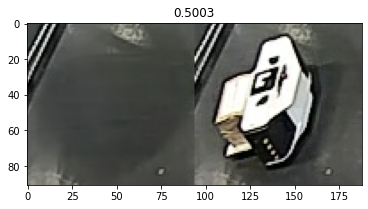

In [98]:
im = cv2.cvtColor(im_src.numpy(), cv2.COLOR_RGB2RGBA)
plt.imshow(im)
plt.title(f'{diff:.4f}')
plt.show() 